# 1 Logistic Regression
## 1.1 1.1 Visualizing the data

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data1 = np.loadtxt(open('ex2data1.txt'), delimiter=',')
data1_x = data1[:,0]
data1_y = data1[:,1]
data1_class = data1[:,2]
length=len(data1_class)

In [11]:
data1_0=data1[data1_class==0]
data1_1=data1[data1_class==1]
data1_0x=data1_0[:,0]
data1_0y=data1_0[:,1]
data1_1x=data1_1[:,0]
data1_1y=data1_1[:,1]

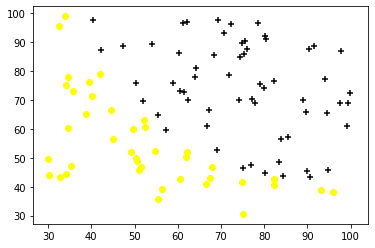

In [16]:
plt.scatter(data1_0x, data1_0y, color='yellow',marker='o',label='not admitted')
plt.scatter(data1_1x,data1_1y, color='black',marker='+',label='admitted')

## 1.2 Implementation
### 1.2.1 Warmup exercise: sigmoid function

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))  #用numpy实现的话，可以计算实数、矢量和矩阵

In [26]:
sigmoid(0)

0.5

### 1.2.2 Cost function and gradient

In [116]:
theta = np.array([0,0,0])  #1*3

I=np.ones(length)da

data1_xin=data1[:,(0,1)]  #100*2
data1_xin=data1_xin.reshape(1,100,2)
X=np.dstack((I,data1_xin)).reshape(100,3) 

![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vg7hflshj315s04st8o.jpg)
![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vgmm2g1yj3172058jrc.jpg)

In [155]:
def cost_function(theta,X,data1_class):
    h=sigmoid(X.dot(theta.T))   #1*100
    J=np.sum((-data1_class)*np.log(h)-(I-data1_class)*np.log(I-h))/length
    return J

def gradient(theta,X,data1_class):
    gradient=np.zeros(3)
    h=sigmoid(X.dot(theta.T))
    for i in range(0,3):
        gradient[i]=np.sum((h-data1_class)*X[:,i].T)/length
    return gradient

### 1.2.3 Learning parameters using fminunc

In [160]:
gradient(theta,X,data1_class)

array([ -0.1       , -12.00921659, -11.26284221])

In [184]:
import scipy.optimize as op
result = op.minimize(fun=cost_function, x0=theta, args=(X, data1_class), method='TNC',jac=gradient)
result

     fun: 0.20349770158947453
     jac: array([9.19873730e-09, 1.03652185e-07, 4.85175325e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131862,   0.20623159,   0.20147149])

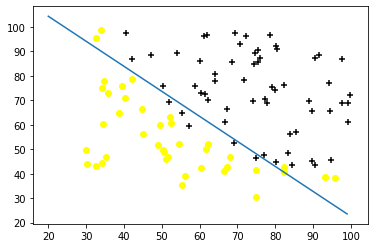

In [187]:
a=range(20,100)
y=(-result.x[0]-result.x[1]*a)/result.x[2]
plt.scatter(data1_0x, data1_0y, color='yellow',marker='o',label='not admitted')
plt.scatter(data1_1x,data1_1y, color='black',marker='+',label='admitted')
plt.plot(a,y)

### 1.2.4 Evaluating logistic regression

In [190]:
x_example=np.array([1,45,85])
pro=sigmoid(np.dot(x_example,result.x))
pro

0.7762906233163949

In [195]:
learn_class=sigmoid(np.dot(X,result.x))
correct=1-np.sum(abs(learn_class-data1_class))/length
correct

0.8716351971473633

# 2 Regularized logistic regression
## 2.1 Visualizing the data

In [220]:
data2 = np.loadtxt(open('ex2data2.txt'), delimiter=',')
data2_x = data2[:,0]
data2_y = data2[:,1]
data2_class = data2[:,2]
length2=len(data2_class)

In [221]:
data2_0=data2[data2_class==0]
data2_1=data2[data2_class==1]
data2_0x=data2_0[:,0]
data2_0y=data2_0[:,1]
data2_1x=data2_1[:,0]
data2_1y=data2_1[:,1]

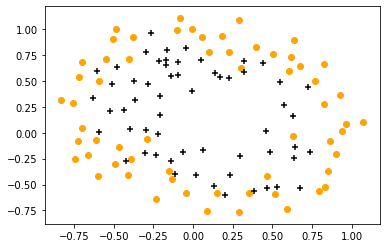

In [222]:
plt.scatter(data2_0x, data2_0y, color='orange',marker='o',label='y=0,rejected')
plt.scatter(data2_1x,data2_1y, color='black',marker='+',label='y=1,accepted')

## 2.2 Feature mapping
![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vrj7x9bsj319e0gkmx6.jpg)

In [239]:
I2=np.ones(length2)
X2=I2

for i in range(1,7):
    for j in range(0,i+1):
        map_temp=(data2_x**(i-j))*(data2_y**j)
        X2=np.vstack((X2,map_temp))

X2.shape

(28, 118)

## 2.3 Cost function and gradient
![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vt0880t8j313y05gjrd.jpg)
![](https://tva1.sinaimg.cn/large/006tNbRwgy1g9vt0q0fuxj313004ijre.jpg)

In [290]:
theta2 = np.zeros(28)

def cost_function_reg(theta2, X2, data2_class, lamda):
    h2=sigmoid((X2.T).dot(theta2))
    J=np.sum((-data2_class)*np.log(h2)-(I2-data2_class)*np.log(I2-h2))/length2+(np.sum(theta2)-theta2[0])*lamda/2/length2
    return J


def gradient_reg(theta2, X2, data2_class, lamda):
    gradient2=np.zeros(28)
    h2=sigmoid((X2.T).dot(theta2))
    
    gradient2[0]=np.sum(h2-data2_class)/length2
    for i in range(1,28):
        gradient2[i]=np.sum((h2-data2_class)*X2[i,:])/length2 + theta2[i]*lamda/length2
    return gradient2

In [291]:
cost_function_reg(theta2, X2, data2_class, 10)

0.6931471805599454

In [293]:
gradient_reg(theta2, X2, data2_class, 10)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

### 2.3.1 Learning parameters using fminunc

In [292]:
lamda=10
result2 = op.minimize(fun=cost_function_reg, x0=theta2, args=(X2, data2_class, lamda), method='TNC',jac=gradient_reg)
result2

     fun: 0.49452587302699597
     jac: array([-1.17420808e-05, -1.17136314e-05, -8.80748387e-06,  4.46729690e-06,
       -5.65421052e-07, -6.02446126e-06, -9.12484854e-06, -3.01865247e-06,
       -2.84581993e-06, -8.07378658e-06,  8.60555072e-07, -9.57599440e-07,
       -1.69942728e-06, -2.02338306e-06, -6.26761731e-06, -5.85674980e-06,
        2.44325446e-06, -2.69826297e-06, -9.37501484e-07, -1.28813129e-06,
       -8.44035488e-06, -3.73001906e-06,  1.37629944e-06, -1.58908930e-06,
        2.78700100e-06,  1.02315178e-06,  1.91349306e-08, -8.07451616e-06])
 message: 'Linear search failed'
    nfev: 47
     nit: 5
  status: 4
 success: False
       x: array([ 0.32613899, -0.00821709,  0.16577033, -0.44663485, -0.11177021,
       -0.27891117, -0.07152129, -0.05791692, -0.06511922, -0.10640543,
       -0.33669997, -0.0129802 , -0.11671703, -0.02811755, -0.28604205,
       -0.11619199, -0.03701435, -0.02244832, -0.04887088, -0.04164167,
       -0.18680443, -0.25336822, -0.0028935 , -0.0

## 2.4 Plotting the decision boundary

In [289]:
from scipy import optimize 
x=range(-1,2)
y=range(-1,2)
x_plot=1*result2.x[0]
for m in range(1,29):
    for i in range(1,7):
        for j in range(0,i+1):
            map_temp=(x**(i-j))*(y**j)
            x_plot=xplot+map_temp*result2.x[m]
plt.contour(x, y, x_plot, 0)

TypeError: 'type' object is not subscriptable